# Sarah's Titanic Data Set
**Author:** Sarah Howard 

**Date:** April 5. 2025

**Objective:** Predicting a Continuous Target with Regression

## Introduction

Using the TItanic dataset, we are going to use regression to predict the fare amount.

## Imports
In the code cell below, import the necessary Python libraries for this notebook. 

In [46]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Section 1. Import and Inspect the Data

### Load the Titanic dataset and confirm it’s structured correctly.

In [47]:
# Load Titanic dataset from seaborn and verify
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 2. Data Exploration and Preparation

### Prepare the Titanic data for regression modeling

In [48]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)

titanic = titanic.dropna(subset=['fare'])

titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

C:\Users\Sarah\AppData\Local\Temp\ipykernel_23860\1712063472.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


## Section 3. Feature Selection and Justification

### Define multiple combinations of features to use as inputs to predict fare.

#### Case 1 - Age only

In [49]:
# Case 1. age
X1 = titanic[['age']]
y1 = titanic['fare']

#### Case 2 - Family Size only

In [50]:
# Case 2. family_size
X2 = titanic[['family_size']]
y2 = titanic['fare']

#### Case 3 - Age and Family Size

In [51]:
# Case 3. age, family_size
X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']

#### Case 4 - Pclass only

In [52]:
# Case 4. Pclass
X4 = titanic[['pclass']]
y4 = titanic['fare']

### Reflection:

**1. Why might these features affect a passenger’s fare:** <br>
These features may affect fare as there could be different pricing dependent on whether the person is an adult or child, whether they are part of a family group or only buying one ticket, and which pclass they purchased.

**2. List all available features:** <br>
survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, alone, family_size

**3. Which other features could improve predictions and why:** <br>
Embark_town may impact fare if there were different rates for different locations. Deck could have a different fare for different deck levels.

**4. How many variables are in your Case 4:** <br>
one variable

**5. Which variable(s) did you choose for Case 4 and why do you feel those could make good inputs:** <br>
I chose pclass for case 4 as I thought that the fare would vary based on the passenger class.

## Section 4. Train a Regression Model (Linear Regression)

### 4.1 Split the Data

In [53]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

### 4.2 Train and Evaluate Linear Regression Models (all 4 cases)

In [54]:
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Predictions

y_pred_train1 = lr_model1.predict(X1_train)
y_pred_test1 = lr_model1.predict(X1_test)

y_pred_train2 = lr_model2.predict(X2_train)
y_pred_test2 = lr_model2.predict(X2_test)

y_pred_train3 = lr_model3.predict(X3_train)
y_pred_test3 = lr_model3.predict(X3_test)

y_pred_train4 = lr_model4.predict(X4_train)
y_pred_test4 = lr_model4.predict(X4_test)

### 4.3 Report Performance

In [55]:
print("Case 1: Training R²:", r2_score(y1_train, y_pred_train1))
print("Case 1: Test R²:", r2_score(y1_test, y_pred_test1))
print("Case 1: Test RMSE:", mean_squared_error(y1_test, y_pred_test1)**2)
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y_pred_test1))
print()

print("Case 2: Training R²:", r2_score(y2_train, y_pred_train2))
print("Case 2: Test R²:", r2_score(y2_test, y_pred_test2))
print("Case 2: Test RMSE:", mean_squared_error(y1_test, y_pred_test2)**2)
print("Case 2: Test MAE:", mean_absolute_error(y2_test, y_pred_test2))
print()

print("Case 3: Training R²:", r2_score(y3_train, y_pred_train3))
print("Case 3: Test R²:", r2_score(y3_test, y_pred_test3))
print("Case 3: Test RMSE:", mean_squared_error(y1_test, y_pred_test3)**2)
print("Case 3: Test MAE:", mean_absolute_error(y3_test, y_pred_test3))
print()

print("Case 4: Training R²:", r2_score(y4_train, y_pred_train4))
print("Case 4: Test R²:", r2_score(y4_test, y_pred_test4))
print("Case 4: Test RMSE:", mean_squared_error(y1_test, y_pred_test4)**2)
print("Case 4: Test MAE:", mean_absolute_error(y4_test, y_pred_test4))


Case 1: Training R²: 0.009950688019452314
Case 1: Test R²: 0.0034163395508415295
Case 1: Test RMSE: 2078918.6797919315
Case 1: Test MAE: 25.28637293162364

Case 2: Training R²: 0.049915792364760736
Case 2: Test R²: 0.022231186110131973
Case 2: Test RMSE: 2001162.422888809
Case 2: Test MAE: 25.02534815941641

Case 3: Training R²: 0.07347466201590014
Case 3: Test R²: 0.049784832763073106
Case 3: Test RMSE: 1889965.573394771
Case 3: Test MAE: 24.284935030470688

Case 4: Training R²: 0.3005588037487471
Case 4: Test R²: 0.3016017234169923
Case 4: Test RMSE: 1020977.7901717048
Case 4: Test MAE: 20.653703671484056


### 4.4 Table of Performance Results

In [56]:
data = {
    'Case': ['Case 1', 'Case 2', 'Case 3', 'Case 4'],
    'Training R²': [0.009950688019452314, 0.049915792364760736, 0.07347466201590014, 0.3005588037487471],
    'Test R²': [0.0034163395508415295, 0.022231186110131973, 0.049784832763073106, 0.3016017234169923],
    'Test RMSE': [2078918.6797919315, 2001162.422888809, 1889965.573394771, 1020977.7901717048],
    'Test MAE': [25.28637293162364, 25.02534815941641, 24.284935030470688, 20.653703671484056]
}

# Create DataFrame
df = pd.DataFrame(data)
df = df.round(3)
# Display table
print(df)

     Case  Training R²  Test R²    Test RMSE  Test MAE
0  Case 1        0.010    0.003  2078918.680    25.286
1  Case 2        0.050    0.022  2001162.423    25.025
2  Case 3        0.073    0.050  1889965.573    24.285
3  Case 4        0.301    0.302  1020977.790    20.654


### Reflection:

***Compare the train vs test results for each.***

**1. Did Case 1 overfit or underfit? Explain:** <br>
Case 1 underfit as the R2 value was close to 0 for both the training data and test data.

**2. Did Case 2 overfit or underfit? Explain:** <br>
Case 2 underfit as the R2 value was close to 0 for both the training data and test data.

**3. Did Case 3 overfit or underfit? Explain:** <br>
Case 3 underfit as the R2 value was close to 0 for both the training data and test data.

**4. Did Case 4 overfit or underfit? Explain:** <br>
Case 4 was a good fit and did not overfit or underfit.

<br>

***Adding Age***

**1. Did adding age improve the model:**<br>
Adding age did improve the model as the training R2 and test R2 improved when age was added to family size.

**2. Propose a possible explanation (consider how age might affect ticket price, and whether the data supports that):** <br>
If the tickets had different fare prices based on age, then having a family with 1-2 adults and 1+ kids could influence the ticket prices. The combination of age and family size helped lower the RMSE and MAE.
<br>

***Worst***

**1. Which case performed the worst:** <br>
Case 1 - Age performed the worst.

**2. How do you know:** <br>
Age had the R2 values (train and test) that were closest to 0. In addition, it had the highest RMSE and MAE.

**3. Do you think adding more training data would improve it (and why/why not):** <br>
Since the R2 values are close to 0, I do not think adding more training data would improve the results.

<br>

***Best***

**1. Which case performed the best:**<br>
Case 4 - Pclass performed the best.

**2. How do you know:** <br>
The R2 scores are balanced and have the best result of all the test cases.  

**3. Do you think adding more training data would improve it (and why/why not):**<br>
Adding more training data may improve the results as currently the model explains approximately 30% of the variance. With additional data, the model may be able to improve on its accuracy.

## Section 5. Compare Alternative Models (Ridge, Elastic Net, Polynomial Regression)

### 5.1 Ridge Regression (L2 penalty)

In [57]:
# Using Case 4 - PClass

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X4_train, y4_train)
y_pred_ridge = ridge_model.predict(X4_test)

r2 = r2_score(y4_test, y_pred_ridge)
print("R² Score:", r2)

mse = mean_squared_error(y4_test, y_pred_ridge)
print("Mean Squared Error:", mse)

R² Score: 0.30224715597914653
Mean Squared Error: 1009.5006518681497


### 5.2 Elastic Net (L1 + L2 combined)

In [58]:
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X4_train, y4_train)
y_pred_elastic = elastic_model.predict(X4_test)

r2 = r2_score(y4_test, y_pred_elastic)
print("R² Score:", r2)

mse = mean_squared_error(y4_test, y_pred_elastic)
print("Mean Squared Error:", mse)

R² Score: 0.3390195349445043
Mean Squared Error: 956.2988041732633


### 5.3 Polynomial Regression

In [59]:
# Set up the poly inputs
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X4_train)
X_test_poly = poly.transform(X4_test)

# Use the poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y4_train)
y_pred_poly = poly_model.predict(X_test_poly)

r2 = r2_score(y4_test, y_pred_poly)
print("R² Score:", r2)

mse = mean_squared_error(y4_test, y_pred_poly)
print("Mean Squared Error:", mse)

R² Score: 0.33610336564092946
Mean Squared Error: 960.5178838060347


### 5.4 Visualize Polynomial Cubic Fit (for 1 input feature)

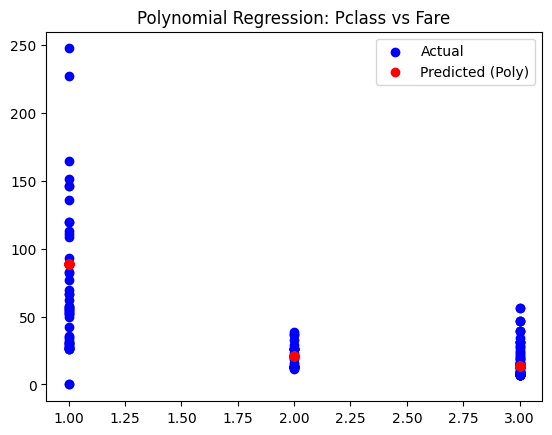

In [60]:
plt.scatter(X4_test, y4_test, color='blue', label='Actual')
plt.scatter(X4_test, y_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression: Pclass vs Fare")
plt.show()

### Reflection:

**1. What patterns does the cubic model seem to capture:** <br>
The model captures that 1st class is paying higher fares.  The 2nd class is a lower fare than 1st class and 3rd class is the lowest predicted fare of all.

**2. Where does it perform well or poorly:** <br>
The model performs fairly well for 2nd and 3rd class. It does not do as well with 1st class when there is more variance in the fares.

**3. Did the polynomial fit outperform linear regression:** <br>
In looking at the actual and the predicted polynomial fit, it performed better than a linear regression because the fares are not linear.

**4. Where (on the graph or among which kinds of data points) does it fit best:** <br>
The 2nd class performs the best as the actual results are most clustered.


### 5.5 Visualize Higher Order Polynomial (for the same 1 input case)

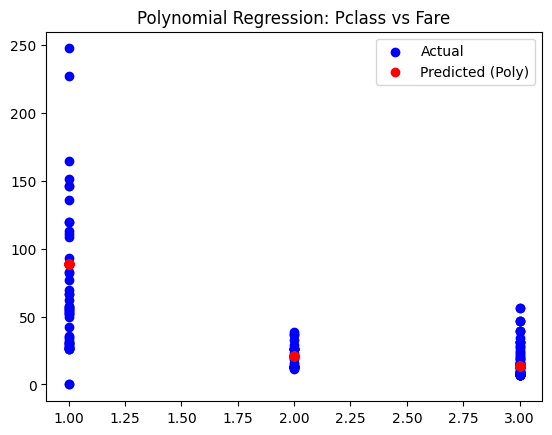

In [61]:
# Set up the poly inputs for a degree of 8
poly = PolynomialFeatures(degree=8)
X_train_poly = poly.fit_transform(X4_train)
X_test_poly = poly.transform(X4_test)

# Use the poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y4_train)
y_pred_poly = poly_model.predict(X_test_poly)

plt.scatter(X4_test, y4_test, color='blue', label='Actual')
plt.scatter(X4_test, y_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression: Pclass vs Fare")
plt.show()

**Comparison of polynomial degree 3 vs polynomial degree 8**<br>
The charts appeared to give the same results no matter which polynomial degree was used.  While I am reflecting degree 8 above, I tried all the different polynomial degrees to see if the chart would appear differently, but it was the same for each attempt.

## Section 6. Final Thoughts & Insights

### 6.1 Summarize Findings

**1.What features were most useful?**<br>
The feature that was the most useful was pclass.

**2. What regression model performed best?**<br>
The Elastic Net Regression model performed the best.  It had the highest R2 score (.339) and the lowest mean squared error (956.299).

Linear 
R² Score: 0.3016017234169923
Mean Squared Error: 1020977.7901717048

Ridge Regression
R² Score: 0.30224715597914653
Mean Squared Error: 1009.5006518681497

Elastic Net Regression
R² Score: 0.3390195349445043
Mean Squared Error: 956.2988041732633

Polynomial Regression
R² Score: 0.33610336564092946
Mean Squared Error: 960.5178838060347

**3. How did model complexity or regularization affect results?**<br>
Regularization helped to improve the results.

### 6.2 Discuss Challenges

**1. Was fare hard to predict? Why?**<br>
Fare was hard to predict as the outliers impacted the results.

**2. Did skew or outliers impact the models?**<br>
Yes, the outliers impacted the models.
